In [41]:

import pandas as pd
from sklearn import preprocessing


In [42]:
sentiment = pd.read_csv("../Data/SentimentValues.csv")
average_sentiment = sentiment.mean(axis = 1)


In [43]:
sentiment

,PublishedTime,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,2020-01-29,0.255208,0.153056,-0.438800,-0.069083
1,2020-01-30,0.022386,0.040869,0.058820,-0.249390
2,2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
3,2020-02-01,0.067340,0.135278,-0.117200,0.247789
4,2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...,...
192,2020-08-08,-0.063788,-0.001423,-0.135520,-0.282620
193,2020-08-09,0.079261,0.099226,0.086975,0.050700
194,2020-08-10,0.325000,0.066414,-0.094050,-0.415917
195,2020-08-11,-0.034291,-0.061445,-0.118208,-0.031385


In [44]:
sentiment.describe()

,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
count,197.000000,197.000000,197.000000,197.000000
mean,0.032804,0.075885,-0.105836,-0.014664
std,0.080801,0.074077,0.152392,0.181162
min,-0.250000,-0.142803,-0.759800,-0.707050
25%,-0.002557,0.030167,-0.190700,-0.124390
50%,0.030871,0.076389,-0.107160,0.000913
75%,0.085606,0.125189,-0.000375,0.118100
max,0.325000,0.297667,0.224867,0.550156


---
Add Moving Average Here

In [45]:
sentiment

,PublishedTime,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,2020-01-29,0.255208,0.153056,-0.438800,-0.069083
1,2020-01-30,0.022386,0.040869,0.058820,-0.249390
2,2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
3,2020-02-01,0.067340,0.135278,-0.117200,0.247789
4,2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...,...
192,2020-08-08,-0.063788,-0.001423,-0.135520,-0.282620
193,2020-08-09,0.079261,0.099226,0.086975,0.050700
194,2020-08-10,0.325000,0.066414,-0.094050,-0.415917
195,2020-08-11,-0.034291,-0.061445,-0.118208,-0.031385


In [46]:
def findQuantile(df, upper = 0.3, lower = 0.7):
    df_quantile = df.quantile([upper, lower], axis = 0)
    return df_quantile


In [47]:
quantile_upper = 0.7
quantile_lower = 0.3

sentiment_quantile = findQuantile(sentiment)

print("Sentiment Value Title Higher :" + str(sentiment_quantile["SentimentValueTitle"].get(quantile_upper)))
print("Sentiment Value Title Lower : " + str(sentiment_quantile["SentimentValueTitle"].get(quantile_lower)))

Sentiment Value Title Higher :0.0668013468013468
Sentiment Value Title Lower : 0.0


In [48]:
PublishedTimeColumn = sentiment.PublishedTime

rolling_df = pd.DataFrame(index = PublishedTimeColumn)
rolling_df

""
PublishedTime
2020-01-29
2020-01-30
2020-01-31
2020-02-01
2020-02-02
...
2020-08-08
2020-08-09
2020-08-10


In [49]:
rolling_title =  sentiment.rolling(14, min_periods= 2).mean().SentimentValueTitleVader
rolling_description = sentiment.rolling(14, min_periods= 2).mean().SentimentValueDescriptionVader
rolling_df = pd.DataFrame({"Title" : rolling_title , "Description" : rolling_description, "PublishedTime" :PublishedTimeColumn } ).set_index(["PublishedTime"])
rolling_df

,Title,Description
PublishedTime,,
2020-01-29,NaN,NaN
2020-01-30,-0.189990,-0.159237
2020-01-31,-0.199490,-0.172550
2020-02-01,-0.178917,-0.067466
2020-02-02,-0.215824,-0.195382
...,...,...
2020-08-08,-0.102321,-0.019335
2020-08-09,-0.098540,-0.007807
2020-08-10,-0.115755,-0.050855


<IPython.core.display.Javascript object>

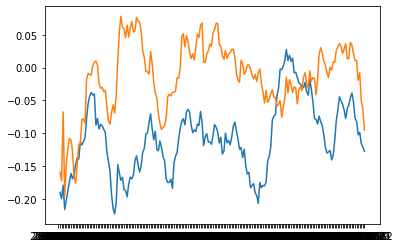

In [50]:
plt.plot(rolling_df)

In [51]:
quantile_rolling = findQuantile(rolling_df)
quantile_rolling

,Title,Description
0.3,-0.135502,-0.035415
0.7,-0.082672,0.015590


In [52]:
testing_threshold = rolling_df.copy()


title_threshold_top = quantile_rolling["Title"].get(quantile_upper)
title_threshold_bottom = quantile_rolling["Title"].get(quantile_lower)
description_threshold_top = quantile_rolling["Description"].get(quantile_upper)
description_threshold_bottom = quantile_rolling["Description"].get(quantile_lower)

print("Sentiment Value Title Higher :" + str(title_threshold_top))
print("Sentiment Value Title Lower : " + str(title_threshold_bottom))

print("Sentiment Value Desp Higher :" + str(description_threshold_top))
print("Sentiment Value Desp Lower : " + str(description_threshold_bottom))

testing_threshold.loc[(testing_threshold.Description < description_threshold_top) & (testing_threshold.Description > description_threshold_bottom ),'Description']= 0
testing_threshold.loc[(testing_threshold.Title < title_threshold_top) & (testing_threshold.Title > title_threshold_bottom ),'Title']= 0



Sentiment Value Title Higher :-0.08267215973510608
Sentiment Value Title Lower : -0.1355021258503401
Sentiment Value Desp Higher :0.015590105519480531
Sentiment Value Desp Lower : -0.035414777494331084


<IPython.core.display.Javascript object>

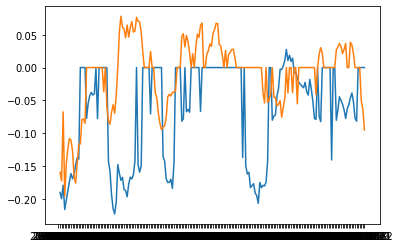

In [53]:
plt.plot(testing_threshold)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

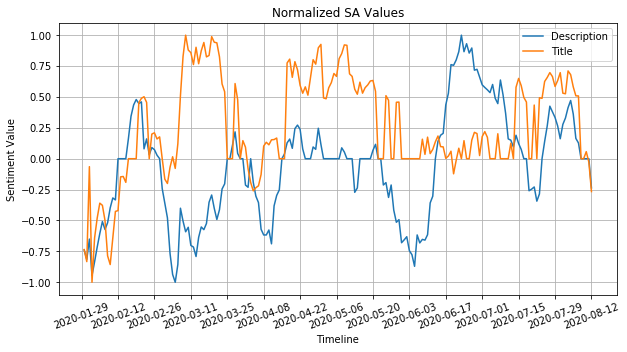

In [78]:
x = rolling_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler( feature_range=(-1, 1 ) )
x_scaled = min_max_scaler.fit_transform(x)
normalized_rolling = pd.DataFrame(x_scaled, columns=rolling_df.columns, index=rolling_df.index)

scalar = 4

description_threshold_top = normalized_rolling.Description.describe()["mean"] + normalized_rolling.Description.describe()["std"] / scalar
description_threshold_bottom = normalized_rolling.Description.describe()["mean"] - normalized_rolling.Description.describe()["std"] / scalar
title_threshold_top = normalized_rolling.Title.describe()["mean"] + normalized_rolling.Title.describe()["std"] / scalar
title_threshold_bottom = normalized_rolling.Title.describe()["mean"] - normalized_rolling.Title.describe()["std"] / scalar


normalized_rolling.loc[(normalized_rolling.Description < description_threshold_top) & (normalized_rolling.Description > description_threshold_bottom ),'Description']= 0
normalized_rolling.loc[(normalized_rolling.Title < title_threshold_top) & (normalized_rolling.Title > title_threshold_bottom ),'Title']= 0

plt.figure(figsize = (10,5)).tight_layout()

plt.plot(normalized_rolling)
plt.legend(["Description" , "Title"])
plt.title("Normalized SA Values")
plt.grid("on")
plt.xlabel("Timeline")
plt.ylabel("Sentiment Value")
plt.xticks(np.arange(0, len(normalized_rolling.dropna())+14, 14), rotation = 20) 
plt.savefig("remove_less_that_half_a_std.png")

In [67]:
np.arange(0, len(normalized_rolling.dropna()), 14)

<IPython.core.display.Javascript object>

array([  0,  14,  28,  42,  56,  70,  84,  98, 112, 126, 140, 154, 168,
       182])

In [71]:
len(normalized_rolling.dropna())

196

<IPython.core.display.Javascript object>

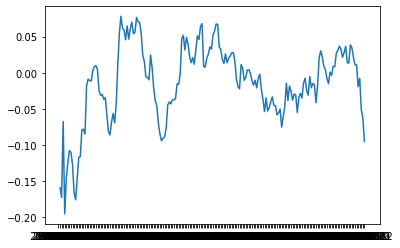

In [55]:
plt.plot(rolling_df.Description)


<IPython.core.display.Javascript object>

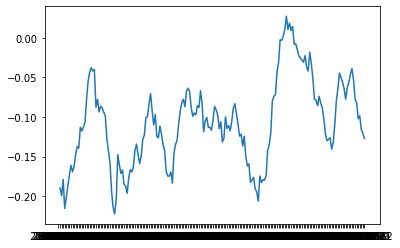

In [56]:
plt.plot(rolling_df.Title)


In [57]:
sentiment

,PublishedTime,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,2020-01-29,0.255208,0.153056,-0.438800,-0.069083
1,2020-01-30,0.022386,0.040869,0.058820,-0.249390
2,2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
3,2020-02-01,0.067340,0.135278,-0.117200,0.247789
4,2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...,...
192,2020-08-08,-0.063788,-0.001423,-0.135520,-0.282620
193,2020-08-09,0.079261,0.099226,0.086975,0.050700
194,2020-08-10,0.325000,0.066414,-0.094050,-0.415917
195,2020-08-11,-0.034291,-0.061445,-0.118208,-0.031385


---

In [58]:
threshold = 0.2
threshold_OG = 0.1

In [30]:
sentiment.loc[(sentiment.SentimentValueDescriptionVader < threshold) & (sentiment.SentimentValueDescriptionVader > -threshold ),'SentimentValueDescriptionVader']= 0
sentiment.loc[(sentiment.SentimentValueTitleVader < threshold) & (sentiment.SentimentValueTitleVader > -threshold ),'SentimentValueTitleVader']= 0
sentiment.loc[(sentiment.SentimentValueDescription < threshold_OG) & (sentiment.SentimentValueDescription > -threshold_OG ),'SentimentValueDescription']= 0
sentiment.loc[(sentiment.SentimentValueTitle < threshold_OG) & (sentiment.SentimentValueTitle > -threshold_OG ),'SentimentValueTitle']= 0
# sentiment.loc[(sentiment.SentimentValueTitleVaderRolling < threshold_OG) & (sentiment.SentimentValueTitleVaderRolling > -threshold_OG ),'SentimentValueTitleVaderRolling']= 0
# sentiment.loc[(sentiment.SentimentValueDescriptionVaderRolling < threshold_OG) & (sentiment.SentimentValueTitleVaderRolling > -threshold_OG ),'SentimentValueDescriptionVaderRolling']= 0

average_sentiment = sentiment.mean(axis = 1)
# rolling_df["Average_of_OG_column_sentiment"] = average_sentiment
# rolling_df.insert(1,"Average_column_sentiment",average_sentiment)

In [31]:
rolling_df

,Title,Description
PublishedTime,,
2020-01-29,NaN,NaN
2020-01-30,-0.189990,-0.159237
2020-01-31,-0.199490,-0.172550
2020-02-01,-0.178917,-0.067466
2020-02-02,-0.215824,-0.195382
...,...,...
2020-08-08,-0.102321,-0.019335
2020-08-09,-0.098540,-0.007807
2020-08-10,-0.115755,-0.050855


In [32]:
sum_sentiment = sentiment.sum(axis = 1)


In [33]:
sum_sentiment

0     -0.030536
1     -0.249390
2     -0.218489
3      0.383067
4     -0.941333
         ...   
192   -0.282620
193    0.000000
194   -0.090917
195    0.000000
196   -0.470900
Length: 197, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

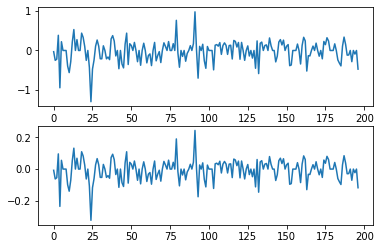

In [34]:
plt.subplot(2,1,1)
plt.plot(sum_sentiment)

plt.subplot(2,1,2)
plt.plot(average_sentiment)

<IPython.core.display.Javascript object>

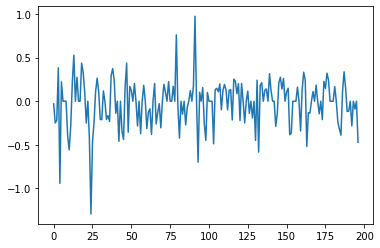

In [35]:

plt.plot(sum_sentiment)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

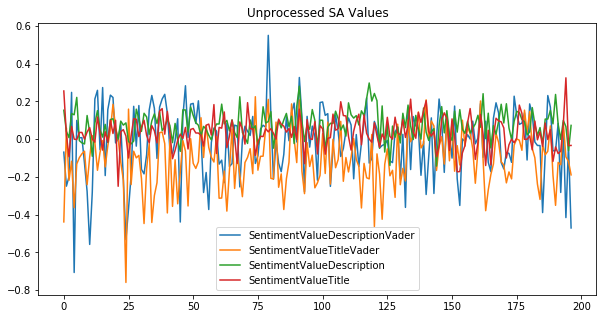

In [59]:

plt.figure(figsize = (10,5))
plt.plot(sentiment.SentimentValueDescriptionVader.values)
plt.plot(sentiment.SentimentValueTitleVader.values)
plt.plot(sentiment.SentimentValueDescription.values)
plt.plot(sentiment.SentimentValueTitle.values)
plt.legend(["SentimentValueDescriptionVader", "SentimentValueTitleVader", "SentimentValueDescription" , "SentimentValueTitle"])
plt.title("Unprocessed SA Values")
plt.savefig("unprocessed_SA_values.png")


<IPython.core.display.Javascript object>

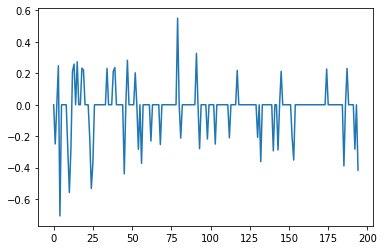

In [67]:
plt.plot(sentiment.SentimentValueDescriptionVader.values)

<IPython.core.display.Javascript object>

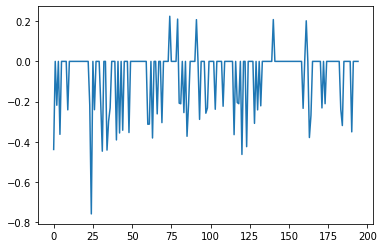

In [68]:
plt.plot(sentiment.SentimentValueTitleVader.values)

<IPython.core.display.Javascript object>

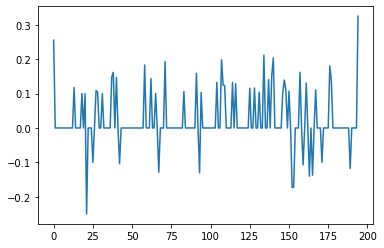

In [69]:
plt.plot(sentiment.SentimentValueTitle.values)

<IPython.core.display.Javascript object>

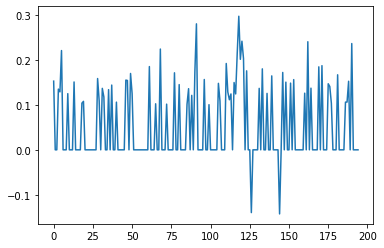

In [70]:
plt.plot(sentiment.SentimentValueDescription.values)

<IPython.core.display.Javascript object>

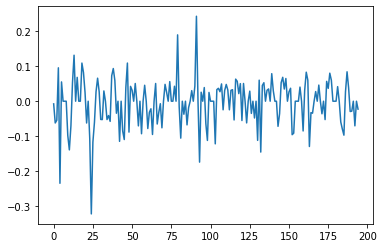

In [71]:
plt.plot(average_sentiment)

In [72]:
sentiment.iloc[25]

PublishedTime                     2020-02-23
SentimentValueTitle                     -0.1
SentimentValueDescription                  0
SentimentValueTitleVader                   0
SentimentValueDescriptionVader       -0.3698
Name: 25, dtype: object

In [73]:
### OG generally more positive, vader more negative

In [74]:
dataframe = pd.DataFrame(average_sentiment)

In [75]:
dataframe

,0
0,-0.007634
1,-0.062347
2,-0.054622
3,0.095767
4,-0.235333
...,...
190,-0.028560
191,0.000000
192,-0.070655
193,0.000000


In [76]:

dataframe.describe()

,0
count,195.000000
mean,-0.004465
std,0.066190
min,-0.323113
25%,-0.036695
50%,0.000000
75%,0.036921
max,0.243597
